# Tutorial to run HOD models using abacus simulation at NERSC
Should work under cosmodesi 2025_03 environment 

In [1]:
from HODDIES.hod import HOD

In [2]:
# Initiate the HOD instance with default parameter file parameters_HODdefaults.yaml
HOD_obj= HOD(path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')


Set number of threads to 128


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z1.100 ...
Done took 00:00:15
Compute columns...
Done took  00:00:02
AbacusSummit_highbase_c000_ph100 at 1.1 loaded, took 00:00:17


In [3]:
# All parameters from the parameter file are set here
HOD_obj.hcat

Catalog(csize=48043269, size=48043269, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id'])

In [4]:
# You can define different tracers 
print('Tracers considered', HOD_obj.args['tracers'])

# You can define different tracers 
print(f"HOD model for {HOD_obj.args['tracers'][0]}: {HOD_obj.args[HOD_obj.args['tracers'][0]]['HOD_model']}")
print(f"HOD model for {HOD_obj.args['tracers'][1]}: {HOD_obj.args[HOD_obj.args['tracers'][1]]['HOD_model']}")

#  All HOD model for central galaxies are define in https://arxiv.org/abs/2306.06319
print('Central HOD model available:', 'SFHOD', 'SHOD', 'GHOD', 'HMQ', 'LNHOD','mHMQ')

print('Satelitte HOD model is the standard power law')

Tracers considered ['ELG', 'LRG']
HOD model for ELG: GHOD
HOD model for LRG: SHOD
Central HOD model available: SFHOD SHOD GHOD HMQ LNHOD mHMQ
Satelitte HOD model is the standard power law


In [5]:
# HOD parameters are set in dictionnary for each tracer 
print(HOD_obj.args['LRG'])
print(HOD_obj.args['ELG'])

{'Ac': 0.05, 'As': 0.11, 'HOD_model': 'SHOD', 'sat_HOD_model': 'Nsat_pow_law', 'M_0': 11.63, 'M_1': 11.7, 'Q': 100, 'alpha': 0.6, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'density': 0.001, 'f_sigv': 1, 'gamma': 1, 'log_Mcent': 11.63, 'pmax': 0.1, 'satellites': True, 'sigma_M': 0.12, 'vel_sat': 'rd_normal', 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'v_infall': 0, 'vsmear': 0}
{'Ac': 0.05, 'As': 0.11, 'HOD_model': 'GHOD', 'sat_HOD_model': 'Nsat_pow_law', 'M_0': 11.63, 'M_1': 11.7, 'Q': 100, 'alpha': 0.6, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'density': 0.001, 'f_sigv': 1, 'gamma': 1, 'log_Mcent': 11.63, 'pmax': 0.1, 'satellites': True, 'sigma_M': 0.12, 'vel_sat': 'rd_normal', 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'v_infall': 0, 'vsmear': None}


In [6]:
# Create galaxy mock catalog, First evaluation is slower because it needs to compile jit functions

cats = HOD_obj.make_mock_cat(fix_seed=None) #return 1 catalogue per tracer 
cat_elg = HOD_obj.make_mock_cat(tracers='ELG') 
cats, cat_elg 

Create mock catalog for ['ELG', 'LRG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 12.712776184082031
Start satellite assignement


/global/u1/a/arocher/Code/postdoc/HOD/Dev/HODDIES/HODDIES/utils.py:495: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "utils.py", line 411:
@njit(fastmath=True)
def get_etavir_nfw(c): 
^

  etaVir = get_etavir_nfw(c[i])*nfw_rescale
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "utils.py", line 483:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=

Satellite assignement done 5.649615287780762
ELG mock catalogue done 5.6973717212677
460476 central galaxies, 537120 satellites, fraction of satellite 0.54 
Done overall time  ELG 19.413065433502197
Run HOD for LRG
Set density to 0.001 gal/Mpc/h
HOD Computed 11.87654972076416
Start satellite assignement
Satellite assignement done 0.7240524291992188
LRG mock catalogue done 0.7499117851257324
258388 central galaxies, 741423 satellites, fraction of satellite 0.74 
Done overall time  LRG 25.884822368621826


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "utils.py", line 483:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


Create mock catalog for ['ELG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.331728458404541
Start satellite assignement
Satellite assignement done 0.40541720390319824
ELG mock catalogue done 0.4206569194793701
460750 central galaxies, 537977 satellites, fraction of satellite 0.54 
Done overall time  ELG 1.2392282485961914


({'ELG': Catalog(csize=997596, size=997596, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central']),
  'LRG': Catalog(csize=999811, size=999811, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central'])},
 {'ELG': Catalog(csize=998727, size=998727, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central'])})

In [7]:
# By default the code automatically
print('Density fixed to ', HOD_obj.args['ELG']['density'], 'ELG catalogue size:', cat_elg['ELG'].size)
print('Remove density constrain')

HOD_obj.args['ELG']['density'] = False
cat_elg_nodens = HOD_obj.make_mock_cat(tracers='ELG') 
print('ELG catalogue size without density constrain:', cat_elg_nodens['ELG'].size)


Density fixed to  0.001 ELG catalogue size: 998727
Remove density constrain
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.300412654876709
Start satellite assignement
Satellite assignement done 0.9630420207977295
ELG mock catalogue done 1.0461158752441406
1015360 central galaxies, 1186750 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.1690144538879395
ELG catalogue size without density constrain: 2202110


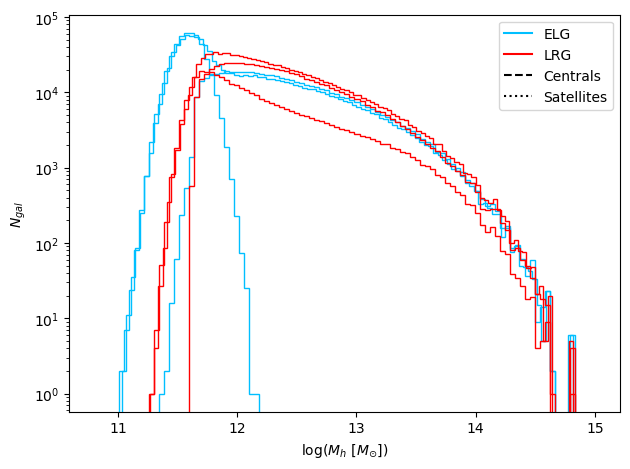

In [8]:
#Plot Halo mass function 

HOD_obj.plot_HMF(cats, show_sat=True)


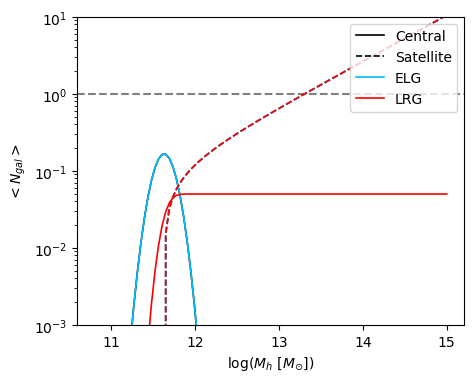

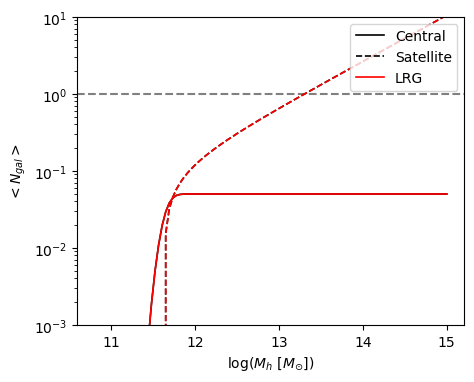

In [9]:
#Plot HOD model
HOD_obj.HOD_plot()
HOD_obj.HOD_plot(tracer='LRG')


In [10]:
# 2PCF settings 
HOD_obj.args['2PCF_settings'] # if edges_rppi/smu are None it will take the rp_min/max 

{'rsd': True,
 'bin_logscale': True,
 'mu_max': 1,
 'n_mu_bins': 101,
 'multipole_index': [0, 2],
 'n_r_bins': 25,
 'n_rp_bins': 25,
 'rmax': 30,
 'rmin': 0.01,
 'rp_max': 30,
 'rp_min': 0.01,
 'seed': None,
 'edges_rppi': None,
 'edges_smu': None,
 'los': 'z',
 'pimax': 40}

In [11]:
#compute clustering for 1 tracer, it apply rsd following the los parameter

rp, wp = HOD_obj.get_wp(cats, tracers='ELG')
s, xi = HOD_obj.get_2PCF(cats, tracers='ELG')

#Computing wp for ELG...
#wp for ELG computed !time = 0.350 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.373 s


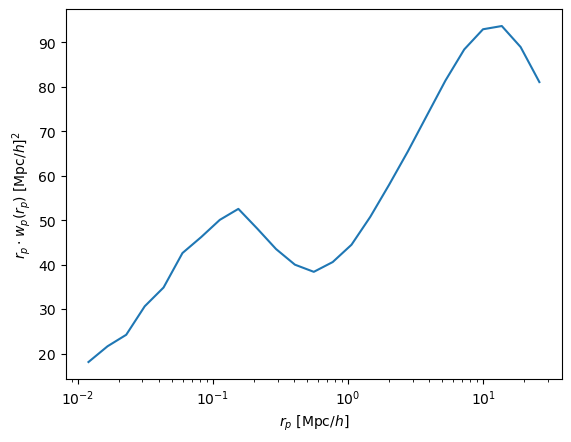

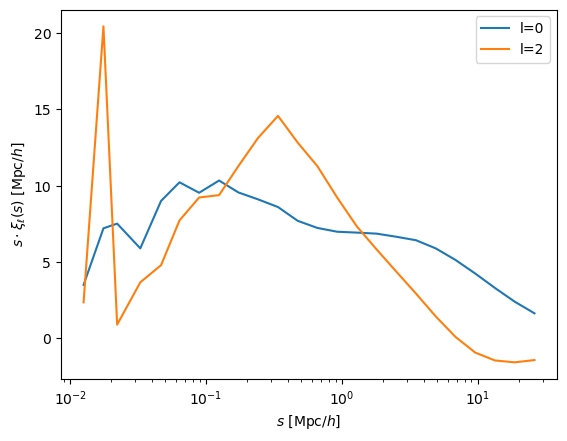

In [12]:
#Plot 2PCF 
import matplotlib.pyplot as plt

plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()


plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [13]:
# Create galaxy mock catalog with different seed
import numpy as np 
cat_elg = [HOD_obj.make_mock_cat(fix_seed=ii, tracers='ELG') for ii in np.random.randint(0,2**32, size=10)]


Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 1.7717046737670898
Start satellite assignement


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "utils.py", line 483:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


Satellite assignement done 3.1576948165893555
ELG mock catalogue done 3.2471628189086914
1013304 central galaxies, 1184787 satellites, fraction of satellite 0.54 
Done overall time  ELG 6.046186923980713
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.7412590980529785
Start satellite assignement
Satellite assignement done 1.0786762237548828
ELG mock catalogue done 1.174342155456543
1015016 central galaxies, 1184872 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.415764570236206
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.28865814208984375
Start satellite assignement
Satellite assignement done 0.9320814609527588
ELG mock catalogue done 1.0161092281341553
1013750 central galaxies, 1186628 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.2809958457946777
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.5978577136993408
Start satellite assignement
Satellite assignem

#Computing wp for ELG...
#wp for ELG computed !time = 0.214 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.261 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.218 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.231 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.235 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.217 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.266 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.209 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.197 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.194 s


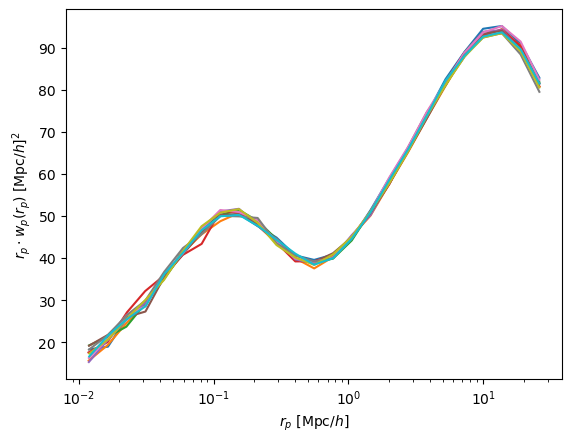

#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 0.928 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 0.938 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.091 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.076 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.008 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.027 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.062 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.023 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.031 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.102 s


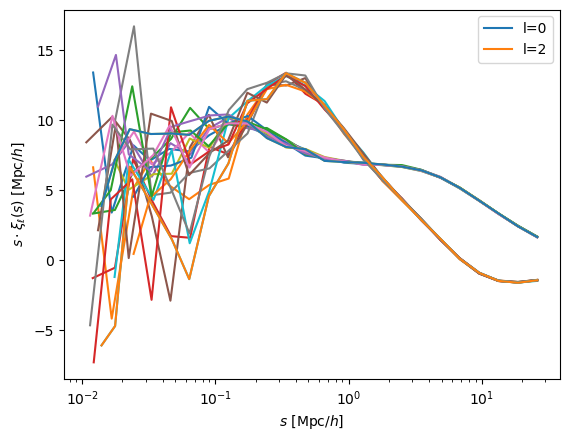

In [50]:
for cat in cat_elg:
    rp, wp = HOD_obj.get_wp(cat, tracers='ELG')
    plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()

for cat in cat_elg:
    s, xi = HOD_obj.get_2PCF(cat, tracers='ELG')
    plt.plot(s,s*xi[0])
    plt.plot(s,s*xi[1])
plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

False

# Use particles for satelittes instead of NFW

In [14]:
# Initiate the HOD instance with default parameter file parameters_HODdefaults.yaml
HOD_obj.args['use_particles'] = True
HOD_obj.args['hcat']['load_particles'] = True

HOD_obj_part= HOD(args=HOD_obj.args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')


Set number of threads to 128
Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z1.100 ...


Done took 00:00:14
Compute columns...
Done took  00:00:00
AbacusSummit_highbase_c000_ph100 at 1.1 loaded, took 00:00:15


In [15]:
#First run need to compile jit functions
# If not enough particles are found, automatically switch to NFW
# Need lot of memory to run with particles, so it might no work with 2Gpc/h box
cats = HOD_obj_part.make_mock_cat(fix_seed=None) 
cats 

Create mock catalog for ['ELG', 'LRG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.3345942497253418
Start satellite assignement
Satellite assignement done 0.47965502738952637
ELG mock catalogue done 0.5021030902862549
461729 central galaxies, 539544 satellites, fraction of satellite 0.54 
Done overall time  ELG 1.3800179958343506
Run HOD for LRG
Set density to 0.001 gal/Mpc/h
HOD Computed 1.3698170185089111
Start satellite assignement
Satellite assignement done 0.7259891033172607
LRG mock catalogue done 0.7511870861053467
257891 central galaxies, 738493 satellites, fraction of satellite 0.74 
Done overall time  LRG 3.0556201934814453


{'ELG': Catalog(csize=1001273, size=1001273, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central']),
 'LRG': Catalog(csize=996384, size=996384, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central'])}

In [16]:
#Second run is faster
cats = HOD_obj_part.make_mock_cat(fix_seed=None) 
cats 

Create mock catalog for ['ELG', 'LRG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.5595064163208008
Start satellite assignement
Satellite assignement done 0.47273707389831543
ELG mock catalogue done 0.5036144256591797
461161 central galaxies, 538950 satellites, fraction of satellite 0.54 
Done overall time  ELG 1.615863561630249
Run HOD for LRG
Set density to 0.001 gal/Mpc/h
HOD Computed 1.6342291831970215
Start satellite assignement
Satellite assignement done 0.6301755905151367
LRG mock catalogue done 0.6623883247375488
258596 central galaxies, 739422 satellites, fraction of satellite 0.74 
Done overall time  LRG 3.4544827938079834


{'ELG': Catalog(csize=1000111, size=1000111, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central']),
 'LRG': Catalog(csize=998018, size=998018, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central'])}